In [1]:
import matplotlib, csv, copy, os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

from pandas import DataFrame, Series

%matplotlib inline

In [2]:
homeData = pd.read_csv('sample1Home.csv', low_memory=False)
awayData = pd.read_csv('sample1Away.csv', low_memory=False)

In [3]:
# https://www.kaggle.com/ajsteele/draw-soccer-pitch-with-matplotlib
# x: [0, 120], y: [0, 90]
def drawSoccerPitch(figsize=(12, 9), fieldColor = 'White', lineColor = 'k'):
    """
    Function that plots a scaled soccer pitch of length 120*90 metres which 
    are the maximum dimensions allowed by FIFAs "Laws Of The Game"
    """
    rect = patches.Rectangle((-1, -1), 122, 92, linewidth=0.1,
                             edgecolor='r', facecolor=fieldColor, zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)
    # Main pitch markings, ie sidelines, penalty area and halfway line
    plt.plot([0, 0,  0, 120, 120, 0,     0,  16.5,  16.5,     0,     0,   5.5,   5.5, 
                  0,  0, 60, 60, 120,   120, 103.5, 103.5,   120,   120, 114.5, 114.5,   120], 
             [0, 0, 90,  90,   0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 
              36.85, 90, 90,  0,   0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85], color=lineColor)
    
    # Secondary pitch markings, ie penalty spots, centre circle etc
    plt.plot([11, 11.5],[45, 45], color=lineColor)
    plt.plot([109, 108.5],[45, 45], color=lineColor)
    
    centre_circle = patches.Circle([60, 45], 9.15, edgecolor=lineColor, facecolor=fieldColor)
    ax.add_patch(centre_circle)
    
    left_arc = patches.Arc([16.5, 45], 9.15, 16, theta1=270.0, theta2=90.0, color=lineColor)
    ax.add_patch(left_arc)
    right_arc = patches.Arc([103.5, 45], 9.15, 16, theta1=90.0, theta2=270.0, color=lineColor)
    ax.add_patch(right_arc)
    
    bl_corner = patches.Arc([0, 0], 2.5, 2.5, theta1=0.0, theta2=90.0, color=lineColor)
    tl_corner = patches.Arc([0, 90], 2.5, 2.5, theta1=270.0, color=lineColor)
    br_corner = patches.Arc([120, 0], 2.5, 2.5, theta1=90.0, theta2=180.0, color=lineColor)
    tr_corner = patches.Arc([120, 90], 2.5, 2.5, theta1=180.0, theta2=270.0,color=lineColor)
    ax.add_patch(bl_corner)
    ax.add_patch(tl_corner)
    ax.add_patch(br_corner)
    ax.add_patch(tr_corner)
    
    plt.xlim(-1, 121)
    plt.ylim(-1, 91)
    plt.axis('off')    

    return fig, ax

In [4]:
# fxn that makes the col names more readable and converts coordinates to meters
def fixDF(df, h_a):
    # storage for better column names, x and y coords
    goodLabels = []
    xLabels = []
    yLabels = []

    # indexer and previous string variable
    i = 0
    prevString = None
    
    # loop over row with col names
    for val in df.loc[1]:
        string = str(val)
        # skip first three col names
        if i <= 2:
            goodLabels.append(string)
        else:
            # don't want ball coordinates to have home / away
            if i <= 30: 
                string = h_a + ' ' + string
            # check if coordinate should be x or y
            if (i % 2) == 1:
                prevString = string
                string = string + ' x'
                xLabels.append(string)
            else:
                string = prevString + ' y'
                yLabels.append(string)
            goodLabels.append(string)
        i += 1
    df.columns = goodLabels
    
    # coord cols as floats not strings
    coords = df.loc[2:]
    coords = coords.apply(pd.to_numeric)
    
    # make in units of meters
    coords[xLabels] *= 120
    coords[yLabels] *= 90
    
    return coords

In [5]:
# get data into meters
homeCoords = fixDF(homeData, 'H')
awayCoords = fixDF(awayData, 'A')

# generate list of player ids
homePlayers = homeCoords.columns[3:-2]
awayPlayers = awayCoords.columns[3:-2]

homePlayerIDs = []
for player in homePlayers:
    homePlayerIDs.append(player[:-2])
    
awayPlayerIDs = []
for player in awayPlayers:
    awayPlayerIDs.append(player[:-2])

In [6]:
def playerPos(player, df, frame):
    xname = player + ' x'
    yname = player + ' y'
    return (df[[xname, yname]].iloc[frame][0], df[[xname, yname]].iloc[frame][1])

def playerPosX(player, df, frame):
    return playerPos(player, df, frame)[0]

def playerPosY(player, df, frame):
    return playerPos(player, df, frame)[1]

In [7]:
def drawFrame(frame):
    fig, ax = drawSoccerPitch(lineColor='0.5')

    for player in homePlayerIDs:
        plt.scatter(playerPosX(player, homeCoords, frame), playerPosY(player, homeCoords, frame), color='k', zorder=5)
    
    for player in awayPlayerIDs:
        plt.scatter(playerPosX(player, awayCoords, frame), playerPosY(player, awayCoords, frame), color='red', zorder=5)
        
    plt.scatter(playerPosX('Ball', homeCoords, frame), playerPosY('Ball', homeCoords, frame), color='blue', zorder=4, marker='x', s=200)

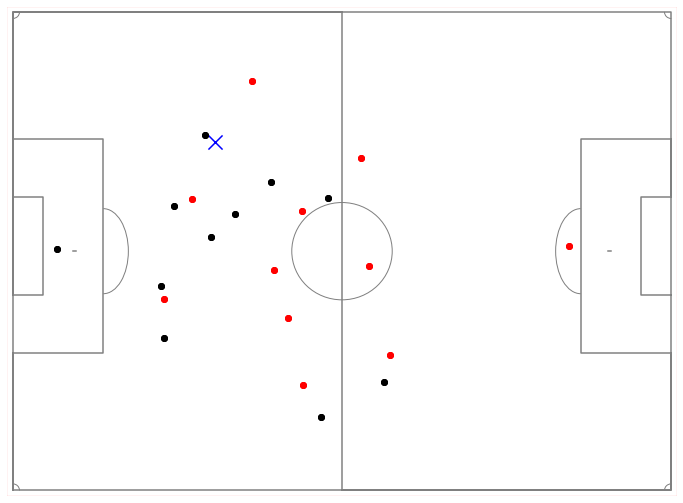

In [10]:
drawFrame(7000)